# Verificación Trabajo Integrador

In [1]:
# Recuerden siempre importar las librerías que vamos usar. Normalmente son estas 3
import pandas as pd #PANDAS
from matplotlib import pyplot as plt #Para plotear
import numpy as np  #Para operaciones matemáticas
from scipy.interpolate import interp1d #interpola los datos. Nos sirve para extraer información

Nota: habitualmente van a encontrar en la documentacion __'df'__, es la notación que se usa para referirse a dataframe. Recordar de evitar sobreescritura de la variable. Como en la celda siguiente=>

In [2]:
#Lectura de datos
df = pd.read_excel('data/Historicos-EstacionItati.xlsx', 
                   skiprows=2, names =['datetime','caudal'])

#df2 = df.iloc[:, 1].str.split(' ', expand=True)
#pd.options.display.max_rows = None
df
#skiprows salta las líneas necesarias que no queremos leer

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [3]:
#Corrección de dato de datetime
df['datetime'] = pd.to_datetime(df.datetime, format="%d/%m/%Y %H:%M")##formateo el tiempo indicandole como es el formato de dato de entrada. Nuestro caso 28/12/2021 00:00

df['datetime'] = df['datetime'].astype('datetime64[ns]')# renombro la columna datetime. La sobre escribo

#### Ploteamos los resultados

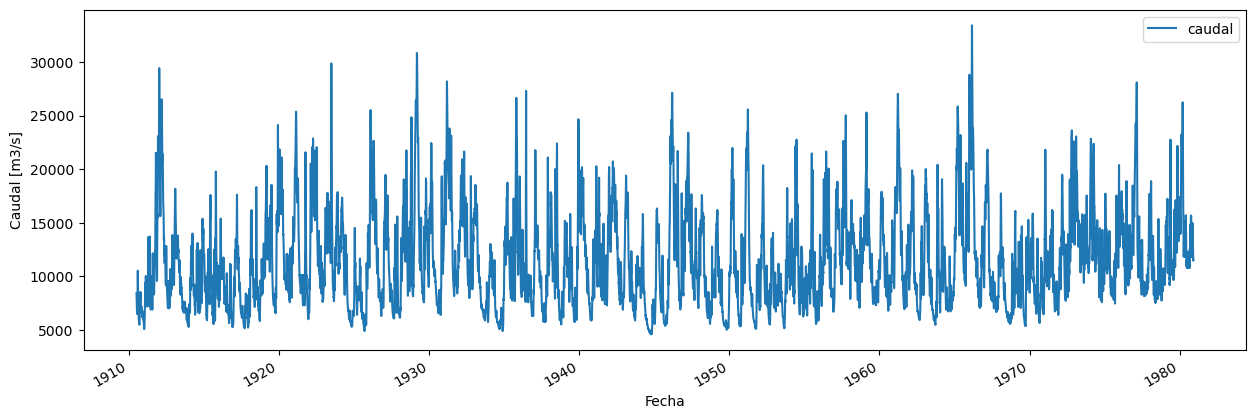

In [4]:
# Ploteamos rapidamente para ver los datos
df.plot(x='datetime', y='caudal', figsize=(15,5)) #el ultimo argumento es el tamaño de la figura
plt.xlabel("Fecha")
plt.ylabel("Caudal [m3/s]")
plt.show()

Bueno primero tengan en cuenta como es la estructura de datos (filas y columnas), muy similar a lo que propone Excel. Ahora bien, podemos emplear esa estructura de datos para realizar operaciones (y muchas). Vamos de fácil a difícil con el dataframe ya leído arriba.

## Frecuencia
__FRECUENCIA RELATIVA__ Obtenemos la frecuencia relativa de una columna de interés, por ejemplo caudal, en base a un método interno de Pandas llamado [`value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html). La función retorna la cantidad de veces que se reítera una variable. Como en nuestro caso debemos analizar rangos, dado que los caudales no son idénticos. Obtenemos la frecuencia relativa y absoluta

In [5]:
#Frecuencia relativa
frecuencia_relativa = df['caudal'].value_counts(sort=False, bins=10000, normalize=True)*100

print(frecuencia_relativa)

intervalos = frecuencia_relativa.keys()

#print(intervalos)

(4558.745, 4590.496]      0.003946
(4590.496, 4593.383]      0.000000
(4593.383, 4596.269]      0.003946
(4596.269, 4599.156]      0.000000
(4599.156, 4602.042]      0.003946
                            ...   
(33437.628, 33440.514]    0.000000
(33440.514, 33443.401]    0.000000
(33443.401, 33446.287]    0.000000
(33446.287, 33449.174]    0.000000
(33449.174, 33452.06]     0.003946
Name: caudal, Length: 10000, dtype: float64


__FRECUENCIA ABSOLUTA__. A continuación obtenemos la frecuencia absoluta

In [6]:
frecuencia_absoluta = 100 - np.sort(np.cumsum(frecuencia_relativa))

#print(frecuencia_absoluta)

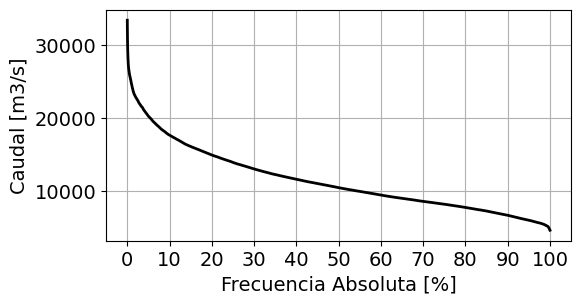

In [7]:
#Creamos figure
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(frecuencia_absoluta, intervalos[:].right,'-k', linewidth=2)

#Editamos la gráfica
ax.tick_params(axis='y', labelsize=14)#Cambia el tamaño de la letra eje X
ax.tick_params(axis='x', labelsize=14)#Cambia el tamaño de la letra eje Y
ax.set_ylabel('Caudal [m3/s]', fontsize=14)# agregar la etiqueta de Y
ax.set_xlabel('Frecuencia Absoluta [%]', fontsize=14)#agregamos la etiqueta de X
ax.xaxis.set_ticks(np.arange(0, 110, 10))#agregamos los limites de x y separación 
ax.grid()

# Si queremos guardar la figura 
#plt.savefig('curva_duracion.jpg', dpi =300)

En el paso siguiente vamos a crear una columna que contega los caudales referidos al delta de porcentaje de duración [0,10,20...]

In [13]:
Qtemp = {}
n = 0 # es una variable bandera que cuenta los pasos
for i in range(0,101,1):
    if 0<i< 100:
        f = interp1d(frecuencia_absoluta, intervalos[:].right)#Hago la interpolación
        Qtemp[n] = f(i)
        n+=1#le sumo uno en cada paso a la variable bandera
    elif i==0:
        Qtemp[n] = np.max(df['caudal'])
    elif i==100: #lo que sigue es porque la función de interpolación no alcanza al 100% y tenemos que agregarlo manualmente al valor mínimo
        Qtemp[n] = np.min(df['caudal'])

print(len(tempor))

100


In [14]:
#contruimos un vector columna
tempor = np.arange(0,100,1) #va hasta 101 porque arange no incluye el ultimo número

#construimos el diccionario
data = {'Tiempo':tempor,
        'Caudal':Qtemp.values()}

# convertimos es diccionario a DataFrame 
df = pd.DataFrame(data) #

#Vemos que tiene
df

Tiempo              Caudal
0        0  24661.853590028524
1        1  22869.053520011454
2        2   21881.71597001322
3        3   21043.69448000635
4        4  20264.614600020308
..     ...                 ...
95      95   5815.170191111111
96      96   5652.121179999999
97      97   5509.511540000001
98      98         5256.103385
99      99             4587.61

[100 rows x 2 columns]

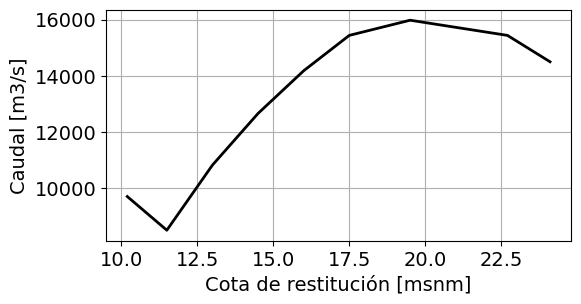

In [18]:
#Dato de entrada que se le otorga en el práctico y se construye en la etapa de diseño. ejemplo río Paraná
#nivelnoan= 1110
#x = [ 126.6, 130,140,150,155.90]#salto
x = [10.2,11.5,13,14.5,16,17.5,19.5,22.7,24.1]#yacyreta
#x = [14.5,16,17.5,19,20.5,22.5,24.5,27]#salto

#y = [36.77, 39.59,39.97,40.60,42.17] 
y = [20*485,20*425,20*541,20*633,20*709,20*772,20*799,20*772,20*725]
#y = [403.77,437.63,465.22,488.89,508.75,512.89,565.28,575.94]

#Creamos figure
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(x, y,'-k', linewidth=2)
#Editamos la gráfica
ax.tick_params(axis='y', labelsize=14)#Cambia el tamaño de la letra eje X
ax.tick_params(axis='x', labelsize=14)#Cambia el tamaño de la letra eje Y
ax.set_ylabel('Caudal [m3/s]', fontsize=14)# agregar la etiqueta de Y
ax.set_xlabel('Cota de restitución [msnm]', fontsize=14)#agregamos la etiqueta de X
ax.grid()

Podemos hacer lo mismo que para curva duración en este caso hacer una interpolación de la curva y extraer los datos o extraerlos mirando

In [19]:
#Construimos la columna y la llenamos de valores calculados de la interpolación de la curva previa
df['H'] = ""
n = 0 # es una variable bandera que cuenta los pasos
f = interp1d(y, x,fill_value='extrapolate')#Hago la interpolación

for (index, value) in  df.iterrows():
    if value[1]>=max(y):
        df.iloc[n,2] =0
        n+=1
    else:
        df.iloc[n,2] = f(value[1])
        n+=1#le sumo uno en cada paso
    
df

Tiempo              Caudal                   H
0        0  24661.853590028524                   0
1        1  22869.053520011454                   0
2        2   21881.71597001322                   0
3        3   21043.69448000635                   0
4        4  20264.614600020308                   0
..     ...                 ...                 ...
95      95   5815.170191111111  14.408565626296298
96      96   5652.121179999999  14.585202055000003
97      97   5509.511540000001  14.739695831666667
98      98         5256.103385  15.014221332916668
99      99             4587.61  15.738422500000002

[100 rows x 3 columns]

Para mayor información pueden ir a los siguiente links:
- Revisar la función interpolar 1D. [LINK](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html)
- Pueden redondear los numero usando la función `round`. [LINK](https://www.w3schools.com/python/ref_func_round.asp)

In [15]:
max(x)

24.1